In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
path = 'individual_stocks_5yr'
company_list = ['AAPL_data.csv', 'GOOG_data.csv', 'MSFT_data.csv', 'AMZN_data.csv']
all_data = pd.DataFrame()

for file in company_list:
    current_df = pd.read_csv(path+'/'+file)
    all_data = pd.concat([all_data, current_df])
all_data.shape

(4752, 7)

In [4]:
all_data.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [5]:
all_data.dtypes

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
Name       object
dtype: object

In [6]:
all_data['date'] = pd.to_datetime(all_data['date'])

In [7]:
all_data.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'Name'], dtype='object')

In [8]:
tech_list = all_data['Name'].unique()

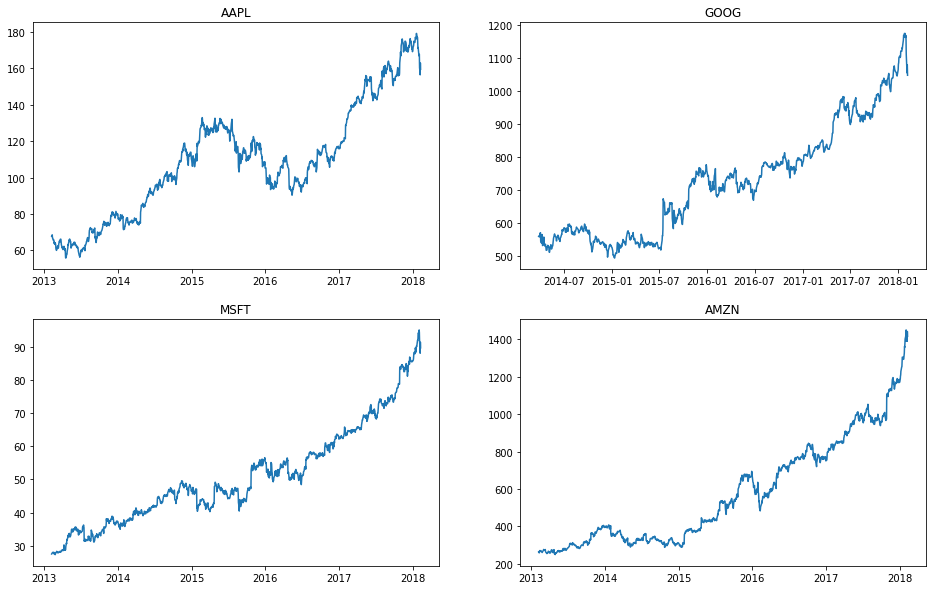

In [9]:
plt.figure(figsize=(16,10))
for i, company in enumerate(tech_list,1):
    plt.subplot(2,2,i)
    df = all_data[all_data['Name']==company]
    plt.plot(df['date'],df['close'])
    plt.title(company)

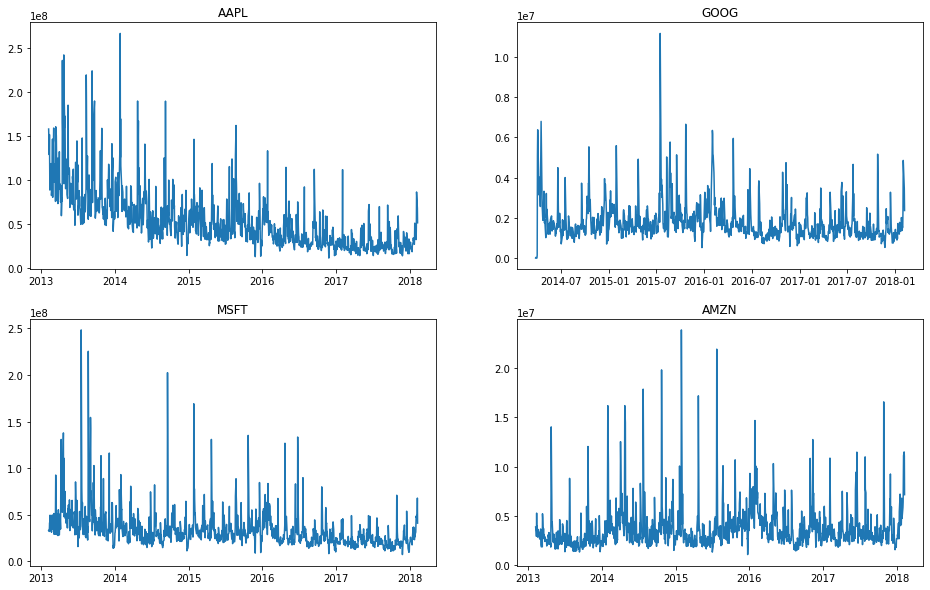

In [10]:
plt.figure(figsize=(16,10))
for i, company in enumerate(tech_list,1):
    plt.subplot(2,2,i)
    df = all_data[all_data['Name']==company]
    plt.plot(df['date'],df['volume'])
    plt.title(company)

In [11]:
import plotly.express as px


In [12]:
for company in tech_list:
    df = all_data[all_data['Name']==company]
    fig = px.line(df, x = 'date', y = 'volume', title=company)
    fig.show()

In [13]:
df = pd.read_csv('individual_stocks_5yr/AAPL_data.csv')
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [14]:
df['daily_stocks_returns'] = df['close']-df['open']

In [15]:
df['1day % return'] = ((df['close']-df['open'])/df['close'])*100


In [16]:
df.head()

,date,open,high,low,close,volume,Name,daily_stocks_returns,1day % return
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,0.1400,0.206325
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,0.4900,0.714688
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-1.6586,-2.481344
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.0286,-0.042869
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,0.2957,0.443624


In [17]:
df.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'Name',
       'daily_stocks_returns', '1day % return'],
      dtype='object')

In [18]:
import plotly.express as px


In [19]:
fig = px.line(df, x = 'date', y= '1day % return', title='')
fig.show()

In [20]:
df2 = df.copy()
df2.dtypes

date                     object
open                    float64
high                    float64
low                     float64
close                   float64
volume                    int64
Name                     object
daily_stocks_returns    float64
1day % return           float64
dtype: object

In [21]:
df2['date'] = pd.to_datetime(df2['date'])

In [22]:
df2.set_index('date',inplace=True)

In [23]:
df2.head()

,open,high,low,close,volume,Name,daily_stocks_returns,1day % return
date,,,,,,,,
2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,0.1400,0.206325
2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,0.4900,0.714688
2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-1.6586,-2.481344
2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.0286,-0.042869
2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,0.2957,0.443624


<AxesSubplot:xlabel='date'>

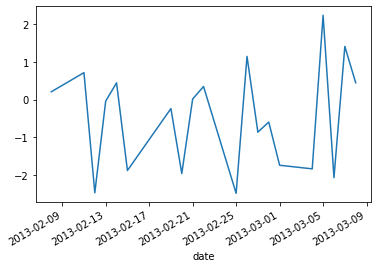

In [24]:
df2['2013-02-08':'2013-03-08']['1day % return'].plot()

<AxesSubplot:xlabel='date'>

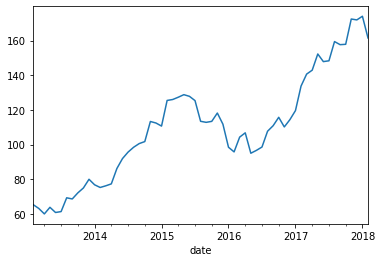

In [25]:
df2['close'].resample('M').mean().plot()

<AxesSubplot:xlabel='date'>

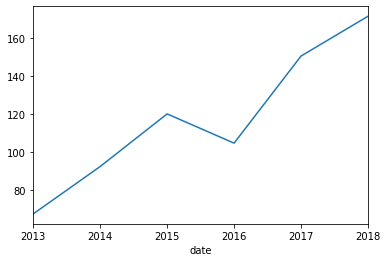

In [26]:
df2['close'].resample('Y').mean().plot()

In [27]:
close = pd.DataFrame()
for company in tech_list:
    df = all_data[all_data['Name']==company]
    close[company] = df['close']

In [28]:
close.head()

,AAPL,GOOG,MSFT,AMZN
0,67.8542,558.46,27.55,261.95
1,68.5614,559.99,27.86,257.21
2,66.8428,556.97,27.88,258.70
3,66.7156,567.16,28.03,269.47
4,66.6556,567.00,28.04,269.24


### Multivariate Analysis

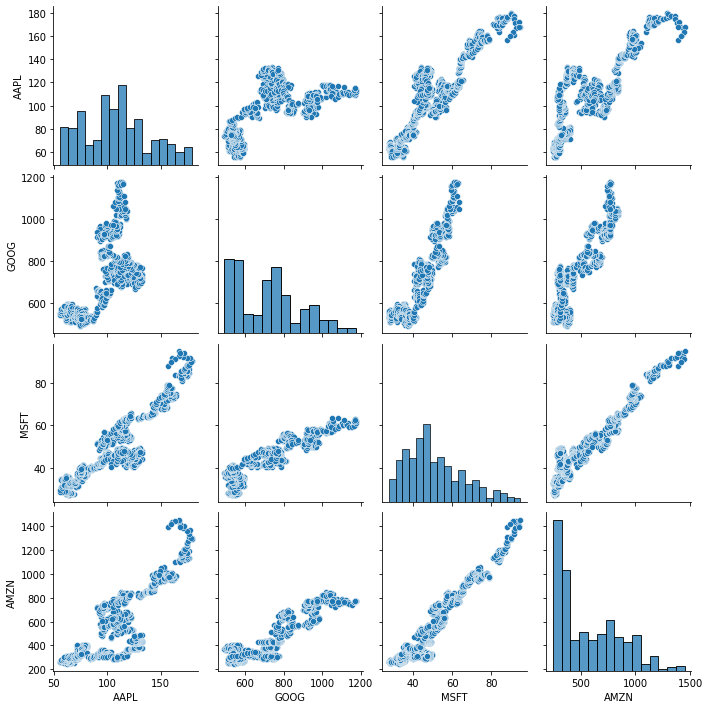

In [29]:
sns.pairplot(data=close)

### Corelation Plot for stock prices

<AxesSubplot:>

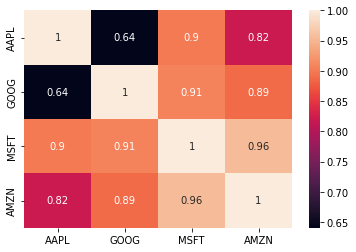

In [30]:
sns.heatmap(close.corr(),annot=True)

In [31]:
daily_return = pd.DataFrame()
for company in tech_list:
    df = all_data[all_data['Name']==company]
    daily_return[company] = ((df['close']-df['open'])/df['close'])*100

    

In [32]:
daily_return.head()

,AAPL,GOOG,MSFT,AMZN
0,0.206325,-1.708269,0.725953,0.209964
1,0.714688,-0.216075,0.753769,-2.328836
2,-2.481344,-1.781065,0.000000,-0.189409
3,-0.042869,1.489879,0.356761,2.946525
4,0.443624,0.334039,0.427960,0.694548


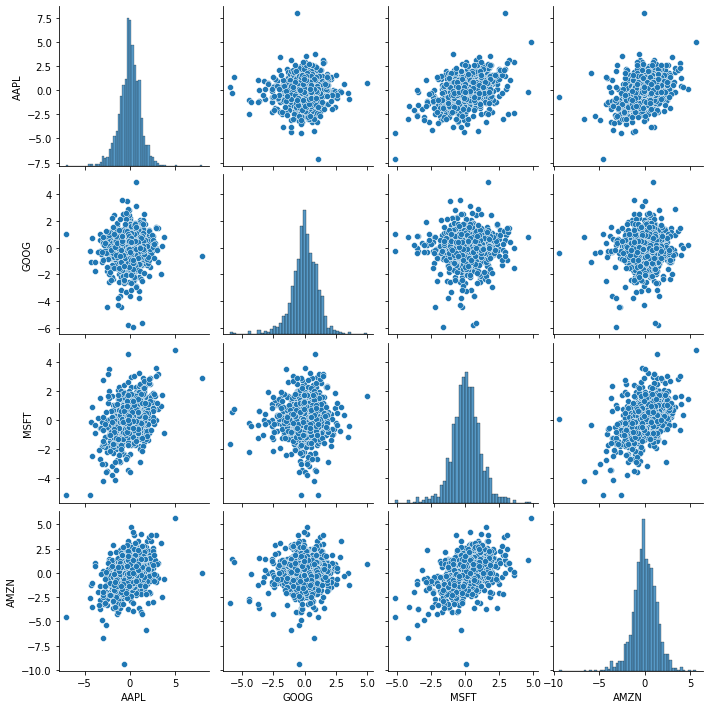

In [33]:
sns.pairplot(data=daily_return)

<AxesSubplot:>

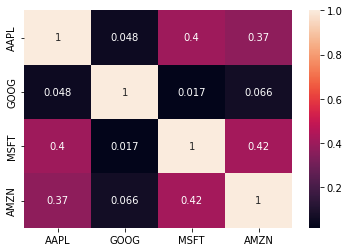

In [34]:
sns.heatmap(daily_return.corr(), annot=True)

### Value at Risk analysis for Apple

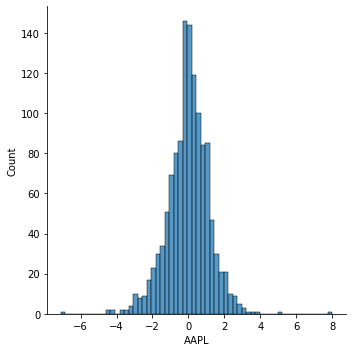

In [35]:
sns.displot(daily_return['AAPL'])

In [37]:
daily_return.describe().T

,count,mean,std,min,25%,50%,75%,max
AAPL,1259.0,-0.000215,1.187138,-7.104299,-0.658021,0.042230,0.715427,8.000388
GOOG,975.0,-0.012495,1.092560,-5.952266,-0.551963,0.024951,0.672649,4.943550
MSFT,1259.0,0.076404,1.059260,-5.177618,-0.509241,0.061069,0.703264,4.861491
AMZN,1259.0,-0.000398,1.358679,-9.363077,-0.738341,-0.002623,0.852568,5.640265
